# Chapter 3 - Linear Regression

Source: An Introduction to Statistical Learning

Notebook Resources:: [ISL-python](https://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/tree/master/Notebooks); [justmarkham's adaption of ISL - Linear Regression](https://github.com/justmarkham/DAT5/blob/master/notebooks/09_linear_regression.ipynb)

Datasets available on http://www-bcf.usc.edu/~gareth/ISL/data.html

### Loading Datasets

In [1]:
import pandas as pd
import numpy as np

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
advertising = pd.read_csv("./data/Advertising.csv", index_col=0)
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## 3.1 Simple Linear Regression

### Least Squares Fit
For the Advertising data, we will plot the least squares fit for the regression of `sales` onto `TV`.

The simple linear regression formula to indicate this relationship is:
    
`sales` ≈ $\beta_{0} + \beta_{1} x$ `TV`

In [3]:
# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


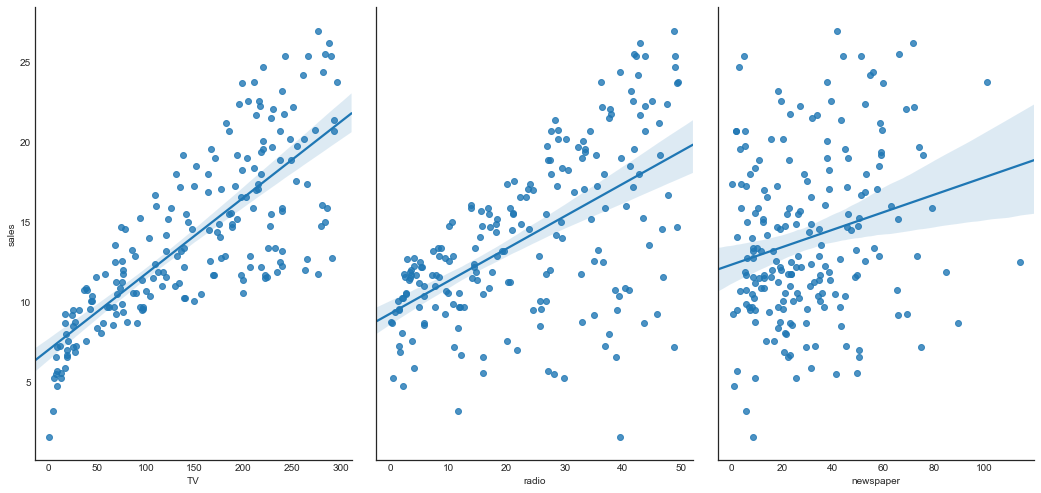

In [4]:
sns.pairplot(advertising, 
             x_vars=['TV', 'radio', 'newspaper'], 
             y_vars='sales', kind='reg',
            size = 7, aspect=0.7)

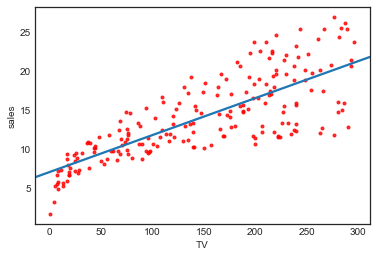

In [5]:
sns.regplot(advertising.TV, advertising.sales, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

The fit is found by minimizing the sum of the squared errors. Each of the gray line segment represents an error, and the fit makes a compromise by averaging their squares. In this case a linear fit captures the essence of the relationship, although it is somewhat deficient in the left of the plot.

### Estimating Regression Coefficient

Now we define a linear regression model with the `sales` column as the response and the `TV` column as the feature in the `advertising` dataset.

In [6]:
# Ordinary Least Squares (ols) 

#create fitted model
lm = smf.ols(formula='sales ~ TV', data = advertising).fit()

print(lm.params,'\n')
print(lm.summary())


Intercept    7.032594
TV           0.047537
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 13 Jan 2019   Prob (F-statistic):           1.47e-42
Time:                        09:16:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

#### Scikit learn
We can also __estimate the model coefficients__ using `sckit-learn`

`.coef_` gives the coefficients and `.intercept_` gives the estimated intercepts.

In [8]:
from sklearn.linear_model import LinearRegression

# define the fetures
feature_cols = ['TV']
X = advertising[feature_cols]
y = advertising.sales
#X = advertising.TV.values.reshape(-1,1)

lm2 = LinearRegression()  # initiate linear regression

lm2.fit(X,y)   # fit the regression

# coefficients
print('Estimated intercept coefficient: ',lm2.intercept_)
print('Number of coefficients: ', lm2.coef_[0])

Estimated intercept coefficient:  7.032593549127693
Number of coefficients:  0.047536640433019764


### Interpreting Model Coefficients

We can interpre the `TV` coefficient (β1) as:
1. a unit increase in `TV` ad spending is __associated with__ a 0.047 "unit" increase in `Sales`.
2. Or more clearly: __An additional 1,000 spent on TV ads is assocated iwth a _decrease_ in `sales`(β1) would be _negative_.__

Therefore we cna concluse that in the absence of any advertising, sales will, on average, fall somewhere between 6,130 and 7,940 units. Furthermore, for each $1,000 increase in TV advertising, there will be an average increase in sales of between 42 and 53 units.

### Using the Model for Predictions.

> Lets say that there was a new market where the TV advertising spending was __50,000 dollars__. __What would we predict for the Sales in that makret?__

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [9]:
# manually calculate the prediction (basically plubg and caclulate)

print("TV sales widges would be: ",7.032594 + 0.047537*50, 
      " if TV advertising spend was $50,000 ")

TV sales widges would be:  9.409444  if TV advertising spend was $50,000 


In [10]:
# Statmodesl
# predict for a new observation
lm.predict(pd.DataFrame({'TV':[50]}))

0    9.409426
dtype: float64

In [11]:
# ScikitLearn
# predict for a new observation
lm2.predict(50)

array([9.40942557])

#### Interpretation of the Model Prediction

we would predict Sales of 9,409 widgets in that market.

## Confidence Internval (confidence in our model)
A closely related concept is confidence intervals. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true" coefficient. 

In [12]:
# statmodels
# confidence interval for the model coefficients
print(lm.conf_int())

                  0         1
Intercept  6.129719  7.935468
TV         0.042231  0.052843


In [13]:
print(lm.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053


#### Interpretation of the Confidence in our Model

From the regression results from above we can see in the case of the advertising data, the __95% confidence interval for $\beta_{0}$ is `[ 6.130, 7.935]` and the 95% confidence interval for $\beta_{1}$ is `[0.042, 0.053]`.__

_This is our estimate of the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is probably within_

## Hypothesis Testing & P-values

Standard errors can alos be used to perform hypothesis tests on the coefficient. 
$$H_0 : \beta_1 = 0$$ 
    
                (H0 : There is no relationship between X and Y)
    
$$H_a : \beta_1 = 0$$ 
        
                (Ha : There is some relationship between X and Y)

To test the null hypothesis, we will need to determine wither beta 1-hat (our estimate for beta1) is sufficiently far from zero that we can be confident that beta 1 is non-zero. We can compute this by using the _t-distribution_ to test this hypothesis:

$$t = \frac{\hat{\beta}_1-0}{SE(\hat{\beta}_1)}$$

Before performing the test we will check for normality assumption before using the test.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


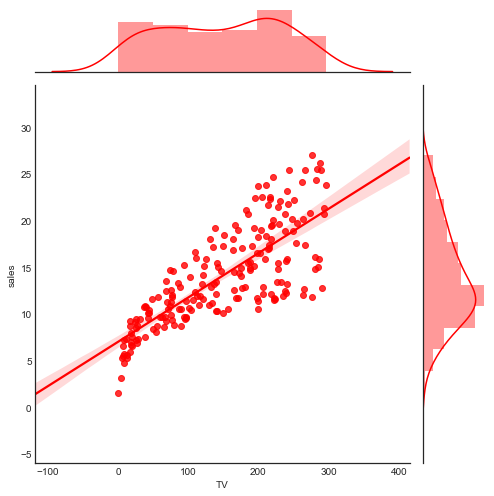

In [14]:
sns.jointplot("TV", "sales", data=advertising, kind="reg",
              color="r", height=7)

appears realitively normal. 

Next we will perform the t-test, to identify the probability of observing any real value equal to |t| or larger, assuming beta1 = 0. 

In [15]:
print(lm.summary().tables[1],"\n")
print("p-values TV for the model coefficients: ", lm.pvalues[1])
print("\nwe ignore the p-value for the intercept")

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053

p-values TV for the model coefficients:  1.4673897001946964e-42

we ignore the p-value for the intercept


The above table provides details of the least squares model for the regression of number of units sold on TV advertising budget for the Advertising data. Notice that the coeﬃcients for ˆ β0 and ˆ β1 are very large relative to their standard errors, so the t-statistics are also large; the probabilities of seeing such values if H0 is true are virtually zero. Hence we can conclude that β0 != 0 and β1 != 0

#### Conclusion
we see a small p-value we can infer that there is an association between the predictor and the response and we will __reject the null hypothesis__ that is, __we _believe_ there is a relaitonship between `TV` (X) and `sales` (Y), since the p-value is less than our alpha of 0.05.__

## Model Accuracy: How Well Does the Model Fit the data?

With the rejection of the null hypothesis we can use the __Residiual Standard Error (RSE) and R-Squiared__ to quantify _the extent to which the model fits the data_.

#### R Squared
The most common way to evaluate the overall fit of a linear model is by the R-squared value. R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model.

In [18]:
print(lm.summary().tables[0])

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 13 Jan 2019   Prob (F-statistic):           1.47e-42
Time:                        09:22:23   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         


Above in the linear model regression results we can see that:
- R-squared = 0.612
- F-statisitic = 312.1

In [19]:
# statmodels
# the R-squared value for the model
lm.rsquared

0.611875050850071

In [20]:
# ScikitLearn
# the R-squared value for the model
lm2.score(X, y)

0.611875050850071

#### Interpretation

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for comparing different models.

#### Correlation Matrix

In [115]:
# correlation matrix
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


----
## Multiple Linear Regression

Now we can extend what we learned from the single regression into include multiple features, called __Multiple Linear Regression__.

$$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$$

Lets estimate these coefficients

In [21]:
# create fitted model with multiple features
lm = smf.ols(formula='sales ~ TV + radio + newspaper', 
             data = advertising).fit()
# print coefficients
print(lm.params,'\n')

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64 



### Feature Selection 
How do I decide which features to include in a linear model? Here's one idea:
- Try different models, and only keep features in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new features.

In [22]:
est = smf.ols('sales ~ TV', advertising).fit()
print("\nSales ~ TV R-squared value:", est.rsquared)

est = smf.ols('sales ~ radio', advertising).fit()
print("\nSales ~ radio R-squared value:", est.rsquared)

est = smf.ols('sales ~ TV + radio', advertising).fit()
print("\nSales ~ TV + radio R-squared value:", est.rsquared)


est = smf.ols('sales ~ newspaper', advertising).fit()
print("\nSales ~ newspaper R-squared value:", est.rsquared)

print("\nSales ~ TV + Radio + News R-squared value:", lm.rsquared)


Sales ~ TV R-squared value: 0.611875050850071

Sales ~ radio R-squared value: 0.33203245544529525

Sales ~ TV + radio R-squared value: 0.8971942610828957

Sales ~ newspaper R-squared value: 0.05212044544430516

Sales ~ TV + Radio + News R-squared value: 0.8972106381789522


#### R-Squared
The $R^2$ value close to 1 indicates that the model explains a large portion of the variance in the response variable. 
- the model that uses all three advertising media to predict sales has an $R^2$ of 0.8972.
- the model that use only `TV` and `radio` to predict sales has $R^2$ of 0.8719.

Therefore, __there is a small increase in $R^2$ if we include `newpaper` advertising in the mode that alread contains `TV` and `Radio` advertising__ even though ealier the p-value for `newpaper` advertising is not significant. 

___Note:___ $R^2$  will ___ALWAYS___ increase when more variables are added to the model, even if those variables are only weakly associated with the reponse. This is due to the fact that adding another variable to the _least squares equation_ must allow us to fit the training data more accurately.


#### Coeffiocient 

In [26]:
# sklearn

# define features
feature_cols = ['TV', 'radio', 'newspaper']
X = advertising[feature_cols]
y = advertising.sales

# institiate regression model
lm2 = LinearRegression()
lm2.fit(X, y)

# coefficients
print('Estimated intercept coefficient: ',lm2.intercept_)
print('Number of coefficients: ', list(zip(feature_cols, lm2.coef_)))

Estimated intercept coefficient:  2.9388893694594067
Number of coefficients:  [('TV', 0.04576464545539761), ('radio', 0.18853001691820462), ('newspaper', -0.0010374930424762972)]


Text(0.5,0,'Sales')

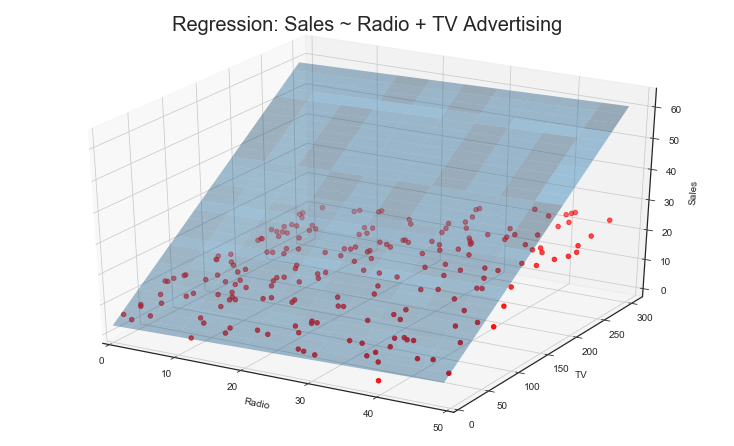

In [28]:
from mpl_toolkits.mplot3d import axes3d

# Create a coordinate grid
Radio = np.arange(0, 50)
TV    = np.arange(0,300)

B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(lm2.intercept_ + B1[i,j]*lm2.coef_[0] + B2[i,j]*lm2.coef_[1])

fig = plt.figure(figsize=(10, 6))
fig.suptitle('Regression: Sales ~ Radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.4)
ax.scatter3D(advertising.radio, advertising.TV, advertising.sales, c='r')

ax.set_xlabel('Radio')
ax.set_xlim(0, 50)
ax.set_ylabel('TV')
ax.set_ylim(ymin=0)
ax.set_zlabel('Sales')

#### Coefficient Interpretation

For a given amoutn of `Radio` and `Newspaper` ad spending, an __increase of 1,000 dollars in `TV` ad spending__ is associated with an __increase in `Sales` of 45.756 widgets.__

### Hypothesis Testig
#### This there a relationship between the response and the predictors?

We test he null hypothesis:

$$H_0 : \beta_1 = \beta_2 = \dots = \beta_p = 0$$

versus the alternative hypothesis:

$$H_a : \text{at least one } \beta_j \text{ is non-zero}$$

This hypothesis test is performed by computing the ***F-statistic***,

$$F = \frac{(TSS-RSS)/p}{RSS/(n-p-1)}$$

We can use the `summary()` in the `Statsmodels` library to see a more details output. 

In [24]:
# print model regression results
print(lm.summary().tables[1])

print("\nF Statistic p-value: ",lm.f_pvalue)
print("\nResidual Standard Error (RSE): ",np.sqrt(lm.scale))

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011

F Statistic p-value:  1.575227256092437e-96

Residual Standard Error (RSE):  1.685510373414744


#### Interpretation:

1. `TV` and `Radio` have a have __significant p-values__, where as `Newspaper` does not. Thus we __reject__ the null hypothesis for `TV` and `Radio` that __there is not association between those features and `Sales`), and _fail to reject_ the null hypothesis for `Newspaper`.__


2. `TV` and `Radio` ad spending are both __positively associated__ with `Sales`, whereas `Newspaper` ad spending is __slightly negatively associated__ with `Sales`. However this is irrelevant since we have failed ot reject the null hypothesis for `Newspaper`


3. This model has a higher __`R-squared` = 0.897__ than the previous model, which means that this model provides a better fit to the data than a model that only includes `TV`.

## Model Evaluation Metrics for Regression

For classification problems, we have only used classification accuracy as our evaluation metric. What metrics can we used for regression problems?

#### Measuing the Quality of Fit
**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: 

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

We can calculate these by hand:

In [31]:
from sklearn import metrics

# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print("MAE: ",metrics.mean_absolute_error(y_true, y_pred))
print("\nMSE: ", metrics.mean_squared_error(y_true, y_pred))
print("\nRMSE: ", np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

MAE:  10.0

MSE:  150.0

RMSE:  12.24744871391589


#### Intepretation
MSE is more popular than MAE becase MSE punishes larger errors. But RMSE is even more popular than MSE becasue RMSE is intrpretable in the "y" units

## Model Evaluation Using Train / Test Split

We will use train/test split with RMSE to see whether Newspaper whould be kept in the model

In [33]:
from sklearn.cross_validation import train_test_split

# include Newspaper
X = advertising[['TV', 'radio', 'newspaper']]
y = advertising.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


lm2 = LinearRegression()  # inititate Linear Regression Model
lm2.fit(X_train, y_train) # fit linear regression model to training data
y_pred = lm2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


----
## Handling Categorical Features with Two Categories

Up to now, all of our features have been numeric. What if one of our features was categorical?

Let's create a new feature called `Size`, and randomly assign observations to be small or large.

In [34]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(advertising))
mask_large = nums > 0.5

# initially set Size to small, then chnage roughly half to be large
advertising['Size'] = 'small'
advertising.loc[mask_large, 'Size'] = 'large'
advertising.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


#### Feature Encoding
Next we need to create binary variable for the `Size` feature. In `Scikit Learn` we need to represent all data __numerically__. If the feature only has two categories, we can simply create a __dummy variable__ that represents the categories as a binary value:

In [39]:
# create a new Series called Size_Large
advertising['Size_large'] = advertising.Size.map({'small':0, 'large':1})
advertising.head()

,TV,radio,newspaper,sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Run the linear regression to include the `Size_large` feature:

In [40]:
# define X and y features
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large']
X = advertising[feature_cols]
y = advertising.sales

# initiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print coefficients
print('Estimated intercept coefficient: ',lm2.intercept_)
print('Number of coefficients: ', list(zip(feature_cols, lm2.coef_)))

Estimated intercept coefficient:  2.9117013282568553
Number of coefficients:  [('TV', 0.045719820924362775), ('radio', 0.1887281431342787), ('newspaper', -0.0010976794483516079), ('Size_large', 0.0574238508548277)]


#### Interpretation

We can inteperate `Size_large` coefficient as: For a given amount of `TV`, `radio`, `newspaper` ad spending, being a large market associated with the average __increase__ in Sales 57.42 widges (as compared to a small market, which is called the __baseline level__). 

If we had reversed the 0/1 encoding and created the feature `size_small` instead, __the coefficient would be the same__, except it would be __negative instead of positive__. As such, your choice of category for the baseline does not matter, all that changes is your __interpretation__ of the coefficient. 

## Handling Categorical Features with More than Two Categories

Now lets create a new feature called `Area`, and randomly assign observations to be `rural, suburban, or urban`.

In [41]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of the observations to each group
nums = np.random.rand(len(advertising))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
advertising['Area'] = 'rural'
advertising.loc[mask_suburban, 'Area'] = 'suburban'
advertising.loc[mask_urban, 'Area'] = 'urban'
advertising.head()

,TV,radio,newspaper,sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an ordered relationship between suburban and urban, and thus urban is somehow "twice" the suburban category. Note that if you do have ordered categories (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

Anyway, our Area feature is unordered, so we have to create additional dummy variables. Let's explore how to do this using pandas:

In [42]:
# create three dummy variables using `get_dummies`
pd.get_dummies(advertising.Area, prefix='Area').head()

,Area_rural,Area_suburban,Area_urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


However we actually only need__two dummy variables, not three__. Why? Because two dummies captures all of the "information" about the `Area` feature, and implicity defines rural as the "baseline level"

check it out:

In [43]:
# create three dummy variables using `get_dummies`
# .. then exclude the first dummy column

area_dummies = pd.get_dummies(advertising.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


#### Coding Intepretations
- __rural__ is coded as Area_suburban=0 and Area_urban=0
- __suburban__ is coded as Area_suburban=1 and Area_urban=0
- __urban__ is coded as Area_suburban=0 and Area_urban=1

If this is confusing, think about why we only needed one dummy variable for Size (Size_large), not two dummy variables (Size_small and Size_large). In general, if you have a categorical feature with k "levels", you create k-1 dummy variables.

Anyway, let's add these two new dummy variables onto the original DataFrame, and then include them in the linear regression model:

In [44]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
advertising = pd.concat([advertising, area_dummies], axis=1)
advertising.head()

,TV,radio,newspaper,sales,Size,Size_large,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [55]:
# define X and y features
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = advertising[feature_cols]
y = advertising.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients 
print('Number of coefficients: ')
list(zip(feature_cols, lm2.coef_))

Number of coefficients: 


[('TV', 0.04574401036331375),
 ('radio', 0.18786669552525806),
 ('newspaper', -0.0010876977267108158),
 ('Size_large', 0.0773966074974793),
 ('Area_suburban', -0.10656299015958645),
 ('Area_urban', 0.26813802165220063)]

#### Interpretation
- Holding all other variables fized, being a `subrban` area is associated with the average __decrease__ in `Sales` of 106.56 widgets (as compared to the baseline level, which is `rural`).
- Being an `urban` area is associated with the average `increase` in `Sales` of 268.14 widgets (as compared to `rural`)